In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#plt.style.use("ggplot")
#%matplotlib inline

## Import data

In [2]:
# Dataset 
dataset = ['ppathl',
           'bioparen',
           'biojob'
          ]

In [3]:
#Variable used for each dataset
vars_set = pd.read_csv("data/Test_varset.csv")
varset = [[] for _ in range(3)]
for i, data in enumerate(dataset):
    sub = vars_set[vars_set['dataset'] == data]
    varset[i] = sub['variable'].tolist()

In [4]:
ppathl =  pd.read_csv("data/ppathl.csv", usecols=varset[0])
#biobirth = pd.read_csv("data/biobirth.csv", usecols=varset[1])
bioparen = pd.read_csv("data/bioparen.csv", usecols=varset[1])
#bioimmig = pd.read_csv("data/bioimmig.csv", usecols=varset[3]) #The variables contained in BIOIMMIG relate to foreigners in (and migrants to) Germany.
biojob = pd.read_csv("data/biojob.csv", usecols=varset[2])

## Merge data

In [5]:
# inner merge with parents info
ppathl.rename(columns={"syear": "bioyear"})
dfMerge = pd.merge(ppathl,bioparen,on=['cid','pid'],how='inner')
print("dfMerge:" + str(dfMerge.shape))

dfMerge:(876791, 24)


In [6]:
ppathl.head(10)


,cid,pid,syear,sex,gebjahr,erstbefr,psample,letztbef,immiyear,germborn,corigin,migback,phrf,phrf0,phrf1
0,19,101,1984,1,1930,1984,1,1989,-2,1,1,1,5020.66,0.0,5020.66
1,19,101,1985,1,1930,1984,1,1989,-2,1,1,1,5068.29,0.0,5068.29
2,19,101,1986,1,1930,1984,1,1989,-2,1,1,1,5137.46,0.0,5137.46
3,19,101,1987,1,1930,1984,1,1989,-2,1,1,1,5511.95,0.0,5511.95
4,19,101,1988,1,1930,1984,1,1989,-2,1,1,1,9068.37,0.0,9068.37
5,19,101,1989,1,1930,1984,1,1989,-2,1,1,1,9680.75,0.0,9680.75
6,19,101,1990,1,1930,1984,1,1989,-2,1,1,1,0.00,0.0,0.00
7,19,102,1984,2,1940,1984,1,1989,-2,1,1,1,4777.63,0.0,4777.63
8,19,102,1985,2,1940,1984,1,1989,-2,1,1,1,5621.63,0.0,5621.63
9,19,102,1986,2,1940,1984,1,1989,-2,1,1,1,5629.61,0.0,5629.61


In [9]:
dfMerge2 = pd.merge(dfMerge,biojob,on=['cid','pid','bioyear'],how='inner')
print("dfMerge2:" + str(dfMerge2.shape))

dfMerge2:(83552, 47)


In [8]:
dfMerge2['bioage'] = dfMerge2['bioyear'] - dfMerge2['gebjahr']

In [9]:
dfMerge2['migback'].value_counts()

1    60544
2    25214
3     6032
Name: migback, dtype: int64

In [22]:
Gen2 = dfMerge2[dfMerge2['migback']==3]
Gen2.shape

(6032, 47)

In [25]:
Gen2['sex'].value_counts()

2    3080
1    2952
Name: sex, dtype: int64

In [20]:
Gen2[['forigin','morigin']].value_counts().head(30) 

forigin  morigin
 2        2         958
-2       -2         843
 1        1         452
 5        5         259
 4        4         216
 5        1         195
 22       22        130
 2        1          94
 1        22         90
 6        6          83
 140      140        71
 22       1          67
 119      119        60
 120      120        58
 10       1          58
 3        3          58
 18       1          56
 74       74         53
 4        1          52
 32       32         49
 1        2          49
 165      165        43
 6        1          43
 1        10         42
          5          41
-2        1          39
 11       1          36
 21       21         34
-2        2          31
 1        31         31
dtype: int64

In [14]:
Gen2['freli','forigin','morigin'].value_counts()

 1    1162
-5     974
 4     704
 6     689
-1     649
 2     607
-2     484
 5     344
 3     299
 7     116
-3       4
Name: freli, dtype: int64

In [11]:
# Father or mother immigrant
Gen2 = Gen2[(Gen2['morigin']!=1)|(Gen2['forigin']!=1)]
Gen2.shape

(5580, 47)

In [12]:
#excluse whose parents country of origin are German 
Gen3 = Gen2[(Gen2['morigin']==1)&(Gen2['forigin']==1)]

In [13]:
Gen2[['forigin','morigin']].value_counts() 

forigin  morigin
 2        2         958
-2       -2         843
 5        5         259
 4        4         216
 5        1         195
                   ... 
 28       22          1
          11          1
         -2           1
 26       122         1
-8       -8           1
Length: 449, dtype: int64

(array([2731.,  691.,  527.,  605.,  369.,  259.,  142.,  122.,   58.,
          35.,   15.,   10.,    8.,    5.,    3.]),
 array([15.        , 20.13333333, 25.26666667, 30.4       , 35.53333333,
        40.66666667, 45.8       , 50.93333333, 56.06666667, 61.2       ,
        66.33333333, 71.46666667, 76.6       , 81.73333333, 86.86666667,
        92.        ]),
 <BarContainer object of 15 artists>)

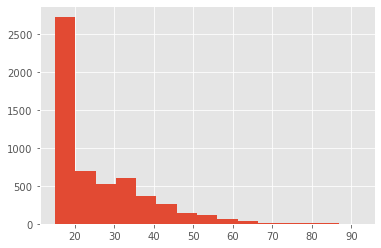

In [14]:
plt.hist(Gen2['bioage'],bins=15)

In [17]:
Gen2[['fjwhite','fjblue','fjselfe','fjcivs']].value_counts()

fjwhite  fjblue  fjselfe  fjcivs
-2.0     -2.0    -2.0     -2.0      1774
-1.0     -1.0    -1.0     -1.0      1560
 30.0    -2.0    -2.0     -2.0       439
 20.0    -2.0    -2.0     -2.0       341
-2.0      11.0   -2.0     -2.0       266
          20.0   -2.0     -2.0       260
 10.0    -2.0    -2.0     -2.0       245
-2.0      12.0   -2.0     -2.0       220
 40.0    -2.0    -2.0     -2.0       114
 22.0    -2.0    -2.0     -2.0        31
-2.0     -2.0     30.0    -2.0        24
 21.0    -2.0    -2.0     -2.0        16
-2.0     -2.0     20.0    -2.0        13
                  40.0    -2.0        11
                 -2.0      30.0       11
                           20.0       11
                           40.0        6
          40.0   -2.0     -2.0         5
         -2.0    -2.0      10.0        3
dtype: int64

In [18]:
Gen2_wk[['fjwhite','fjblue','fjselfe','fjcivs']].value_counts()

fjwhite  fjblue  fjselfe  fjcivs
-1.0     -1.0    -1.0     -1.0      769
 30.0    -2.0    -2.0     -2.0      370
 20.0    -2.0    -2.0     -2.0      289
-2.0      20.0   -2.0     -2.0      232
 10.0    -2.0    -2.0     -2.0      190
-2.0      11.0   -2.0     -2.0      185
         -2.0    -2.0     -2.0      136
          12.0   -2.0     -2.0      131
 40.0    -2.0    -2.0     -2.0       92
-2.0     -2.0     30.0    -2.0       17
                  20.0    -2.0       12
                  40.0    -2.0        9
                 -2.0      20.0       8
                           30.0       7
                           40.0       6
                           10.0       2
dtype: int64

In [19]:
Gen2_wk[['forigin','morigin']].value_counts() 

forigin  morigin
-2       -2         796
 2        2         416
 5        1         109
          5          88
 4        4          87
                   ... 
 38       38          1
 36       36          1
 32       132         1
          77          1
 28       32          1
Length: 313, dtype: int64

## Direct migration background

In [20]:
Direct_mig = dfMerge2[dfMerge2['migback']==2]
Direct_mig.shape

(25214, 47)

In [21]:
Direct_mig[['fjwhite','fjblue','fjselfe','fjcivs']].value_counts()

fjwhite  fjblue  fjselfe  fjcivs
-1.0     -1.0    -1.0     -1.0      13416
-2.0     -2.0    -2.0     -2.0       3554
          11.0   -2.0     -2.0       1631
          20.0   -2.0     -2.0       1365
          12.0   -2.0     -2.0       1286
 30.0    -2.0    -2.0     -2.0        848
 20.0    -2.0    -2.0     -2.0        613
 40.0    -2.0    -2.0     -2.0        286
 10.0    -2.0    -2.0     -2.0        267
-2.0      40.0   -2.0     -2.0        149
          10.0   -2.0     -2.0        120
         -2.0     30.0    -2.0         72
                  40.0    -2.0         62
                  10.0    -2.0         41
                 -2.0      20.0        34
                           30.0        32
                  20.0    -2.0         32
                 -2.0      10.0        29
                           40.0        17
 22.0    -2.0    -2.0     -2.0         16
 21.0    -2.0    -2.0     -2.0          8
-2.0      31.0   -2.0     -2.0          4
 50.0    -2.0    -2.0     -2.0          4
-

In [26]:
Direct_mig_age = Direct_mig[Direct_mig['bioage']<100]

(array([3151., 3047., 4243., 3737., 3830., 2453., 2017., 1187.,  847.,
         307.,  221.,   98.,   53.,   16.,    6.]),
 array([15.        , 20.46666667, 25.93333333, 31.4       , 36.86666667,
        42.33333333, 47.8       , 53.26666667, 58.73333333, 64.2       ,
        69.66666667, 75.13333333, 80.6       , 86.06666667, 91.53333333,
        97.        ]),
 <BarContainer object of 15 artists>)

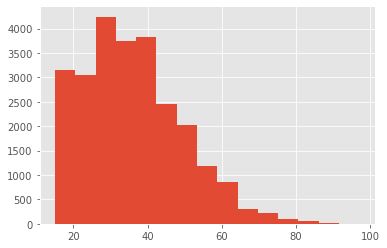

In [27]:
plt.hist(Direct_mig_age['bioage'],bins=15)

## No Migration background

In [22]:
Natives = dfMerge2[dfMerge2['migback']==1]
Natives.shape

(60544, 47)

In [23]:
Natives[['fjwhite','fjblue','fjselfe','fjcivs']].value_counts()

fjwhite  fjblue  fjselfe  fjcivs
-1.0     -1.0    -1.0     -1.0      12077
-2.0      20.0   -2.0     -2.0      10721
 30.0    -2.0    -2.0     -2.0       7289
-2.0     -2.0    -2.0     -2.0       6979
 20.0    -2.0    -2.0     -2.0       6142
-2.0      12.0   -2.0     -2.0       2591
          11.0   -2.0     -2.0       2464
 40.0    -2.0    -2.0     -2.0       2120
 10.0    -2.0    -2.0     -2.0       1268
-2.0     -2.0    -2.0      30.0       507
                           20.0       502
                           40.0       290
                  30.0    -2.0        231
                  40.0    -2.0        222
                 -2.0      10.0       211
          10.0   -2.0     -2.0        181
         -2.0     20.0    -2.0        179
                  10.0    -2.0        144
 22.0    -2.0    -2.0     -2.0         85
 21.0    -2.0    -2.0     -2.0         38
 50.0    -2.0    -2.0     -2.0         19
-2.0      31.0   -2.0     -2.0         17
          40.0   -2.0     -2.0         13
 

(array([1.027e+04, 5.524e+03, 6.132e+03, 6.318e+03, 6.874e+03, 6.419e+03,
        4.980e+03, 3.567e+03, 3.886e+03, 3.015e+03, 2.049e+03, 1.049e+03,
        3.840e+02, 7.300e+01, 4.000e+00]),
 array([ 14.        ,  19.86666667,  25.73333333,  31.6       ,
         37.46666667,  43.33333333,  49.2       ,  55.06666667,
         60.93333333,  66.8       ,  72.66666667,  78.53333333,
         84.4       ,  90.26666667,  96.13333333, 102.        ]),
 <BarContainer object of 15 artists>)

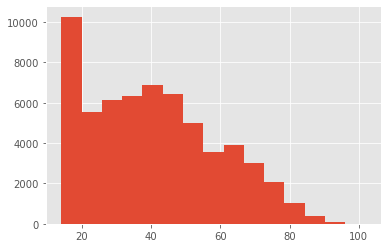

In [28]:
plt.hist(Natives['bioage'],bins=15)